<a href="https://colab.research.google.com/github/Jachmi03/lecture/blob/regresja/PUM5_regresjanieliniowa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import PredictionErrorDisplay

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-9f69f8392d9a>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.9k/18.9k [00:00<00:00, 18.7MB/s]

First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
df.info()

le = LabelEncoder()

for column in ['Gender', 'Education Level', 'Job Title']:
  if column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  20

Zbuduj model benchmarkowy - zwykłą regresję liniową

In [12]:
if 'Salary' in df.columns:
  df['Salary'].fillna(df['Salary'].median(), inplace=True)

In [13]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-13-33badb1f1ff3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [14]:
if 'Years of Experience' in df.columns:
  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)

<ipython-input-14-069a0a8a3d1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)


In [15]:

X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 267810720.62708247
Mean Absolute Error: 11026.42501874865
R-squared: 0.8894732564765409


Sprawdź czy w danych występuje współliniowość współczynnikiem VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


               feature        VIF
0                  Age  15.134250
1               Gender   2.046995
2      Education Level   2.320120
3            Job Title   4.890706
4  Years of Experience   9.400290


Spróbuj poprawić wynik używając regresji LASSO

In [22]:

lasso_model = Lasso(alpha=0.1)  # alpha to parametr regularyzacji, można go dobrać
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ocena modelu LASSO
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"\nLASSO Model:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"R-squared: {r2_lasso}")





LASSO Model:
Mean Squared Error: 270847089.1835715
Mean Absolute Error: 10968.276794704683
R-squared: 0.888220132897694


Zbuduj dodatkową zmienną, kwadrat lat doświadczenia, zbuduj ponownie regresję


In [18]:

df['Years of Experience Squared'] = df['Years of Experience'] ** 2

# Podziel dane na zbiór treningowy i testowy
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Zbuduj model regresji liniowej z nową zmienną
model_with_sq = LinearRegression()
model_with_sq.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_with_sq = model_with_sq.predict(X_test)

# Ocena modelu z nową zmienną
mse_with_sq = mean_squared_error(y_test, y_pred_with_sq)
mae_with_sq = mean_absolute_error(y_test, y_pred_with_sq)
r2_with_sq = r2_score(y_test, y_pred_with_sq)

print(f"\nModel with Years of Experience Squared:")
print(f"Mean Squared Error: {mse_with_sq}")
print(f"Mean Absolute Error: {mae_with_sq}")
print(f"R-squared: {r2_with_sq}")



Model with Years of Experience Squared:
Mean Squared Error: 270851937.4899723
Mean Absolute Error: 10968.303695557772
R-squared: 0.8882181319788479


narysyj wykres typu scatterplot, dla zmiennych lata doswiadczenia i płaca, czy regresja wyższego rzędu jest uzasadniona?

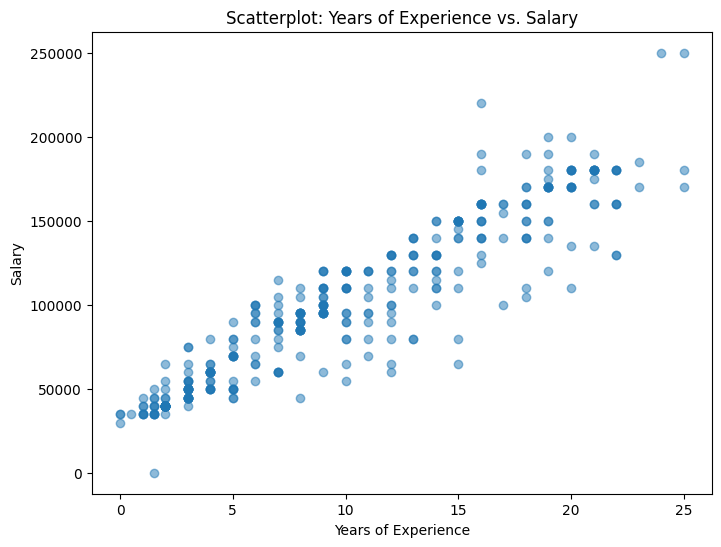

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatterplot: Years of Experience vs. Salary')
plt.show()


Spróbuj wykorzystać regresje za pomocą K-NN
https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py

In [20]:

from sklearn.neighbors import KNeighborsRegressor

# Podziel dane na zbiór treningowy i testowy
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie danych - ważne dla KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicjalizacja i trenowanie modelu KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Możesz eksperymentować z liczbą sąsiadów
knn_model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_knn = knn_model.predict(X_test)

# Ocena modelu KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nKNN Model:")
print(f"Mean Squared Error: {mse_knn}")
print(f"Mean Absolute Error: {mae_knn}")
print(f"R-squared: {r2_knn}")



KNN Model:
Mean Squared Error: 273831597.3333333
Mean Absolute Error: 10998.133333333333
R-squared: 0.8869884123525269
